# Import Libraries

In [334]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [335]:
#importing the data
train= pd.read_csv('/content/drive/MyDrive/DataSets/Miska/train.csv')
test= pd.read_csv('/content/drive/MyDrive/DataSets/Miska/test.csv')

In [336]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [337]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [338]:
#combining train adn test data set 
titan = pd.concat([train, test], sort = False)

In [339]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


We Observe that there are four types of features that we can consider for modelling:

**Categorical**: Embarked (C = Cherbourg; Q = Queenstown; S = Southampton)

**Ordinal**:  Pclass (1, 2, 3)

**Binary**: Sex (Male/Female)

**Continuous**:  Age, Fare

**Count**: SibSp, Parch

*PassengerId, Name ,Ticket,Cabin columns are ignored.*

In [340]:
# checking null values

titan.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [341]:
#Converting Datatype
titan["PassengerId"]=titan["PassengerId"].astype("object")
titan["Pclass"]=titan["Pclass"].astype("object")

#Filling the null values 
titan["Age"]=titan["Age"].fillna((titan["Age"].mean()))   #replace with mean 
titan["Embarked"]=titan["Embarked"].fillna((titan["Embarked"].mode()[0][0]))  #replaced with mode 
titan["Cabin"]=titan["Cabin"].fillna("UNK") #replaced with UNK(unknown)
titan["Fare"]=titan["Fare"].fillna((titan["Fare"].mean()))

# converting age column continous to categorical
titan.loc[titan['Age'] <= 16, 'Age'] = 0
titan.loc[(titan['Age'] > 16) & (titan['Age'] <= 32), 'Age'] = 1
titan.loc[(titan['Age'] > 32) & (titan['Age'] <= 48), 'Age'] = 2
titan.loc[(titan['Age'] > 48) & (titan['Age'] <= 64), 'Age'] = 3
titan.loc[ titan['Age'] > 64, 'Age'] = 4


#Creating new feature using SibSp and Parch
titan["Family_Members"]=(titan["SibSp"] + titan["Parch"]).astype("int")

#Creating neew feature that calculates fare price per person
titan["Fare_PP"]=(titan["Fare"]/(titan["Family_Members"]+1)).astype("float")  

#creating new feature Deck to remove numbers 
titan["CabinClass"]=titan["Cabin"].apply(lambda x: "UNK" if x=="UNK" else x[0]) 

In [342]:
###TEST DATA

#Converting Datatype
test["PassengerId"]=test["PassengerId"].astype("object")
test["Pclass"]=test["Pclass"].astype("object")

#Filling the null values 
test["Age"]=test["Age"].fillna((test["Age"].mean()))   #replace with mean 
test["Embarked"]=test["Embarked"].fillna((test["Embarked"].mode()[0][0]))  #replaced with mode 
test["Cabin"]=test["Cabin"].fillna("UNK") #replaced with UNK(unknown)
test["Fare"]=test["Fare"].fillna((test["Fare"].mean()))

# converting age column continous to categorical
test.loc[test['Age'] <= 16, 'Age'] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age'] = 1
test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
test.loc[ test['Age'] > 64, 'Age'] = 4


#Creating new feature using SibSp and Parch
test["Family_Members"]=(test["SibSp"] + test["Parch"]).astype("int")

#Creating neew feature that calculates fare price per person
test["Fare_PP"]=(test["Fare"]/(test["Family_Members"]+1)).astype("float")  

#creating new feature Deck to remove numbers 
test["CabinClass"]=test["Cabin"].apply(lambda x: "UNK" if x=="UNK" else x[0]) 

In [343]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Members,Fare_PP,CabinClass
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,UNK,S,1,3.62500,UNK
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C85,C,1,35.64165,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,UNK,S,0,7.92500,UNK
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S,1,26.55000,C
4,5,0.0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,UNK,S,0,8.05000,UNK


In [344]:
#extracting titles from the names

import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+\.)', name)
    
    if title_search:
        return title_search.group(1)
    return ""

titan['Title'] = titan['Name'].apply(get_title)
test['Title'] = test['Name'].apply(get_title) #test data

titan['Title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Dr.            8
Rev.           8
Col.           4
Mlle.          2
Ms.            2
Major.         2
Sir.           1
Don.           1
Lady.          1
Dona.          1
Capt.          1
Countess.      1
Jonkheer.      1
Mme.           1
Name: Title, dtype: int64

In [345]:
#reducing the count
titan['Title'] = titan['Title'].replace(['Capt.', 'Dr.', 'Major.', 'Rev.'], 'Officer.')
titan['Title'] = titan['Title'].replace(['Lady.', 'Countess.', 'Don.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Royal.')
titan['Title'] = titan['Title'].replace(['Mlle.', 'Ms.'], 'Miss.')
titan['Title'] = titan['Title'].replace(['Mme.'], 'Mrs.')

#Dropping columns as the target is not dependent on Ticket , Cabin and Name
titan.drop(['PassengerId','Ticket','Cabin','SibSp','Parch','Name'], axis = 1, inplace = True)

In [346]:
###TEST DATA
#reducing the count
test['Title'] = test['Title'].replace(['Capt.', 'Dr.', 'Major.', 'Rev.'], 'Officer.')
test['Title'] = test['Title'].replace(['Lady.', 'Countess.', 'Don.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Royal.')
test['Title'] = test['Title'].replace(['Mlle.', 'Ms.'], 'Miss.')
test['Title'] = test['Title'].replace(['Mme.'], 'Mrs.')

#Dropping columns as the target is not dependent on Ticket , Cabin and Name
test.drop(['PassengerId','Ticket','Cabin','SibSp','Parch','Name'], axis = 1, inplace = True)

In [347]:
titan.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_Members,Fare_PP,CabinClass,Title
0,0.0,3,male,1.0,7.2500,S,1,3.62500,UNK,Mr.
1,1.0,1,female,2.0,71.2833,C,1,35.64165,C,Mrs.
2,1.0,3,female,1.0,7.9250,S,0,7.92500,UNK,Miss.
3,1.0,1,female,2.0,53.1000,S,1,26.55000,C,Mrs.
4,0.0,3,male,2.0,8.0500,S,0,8.05000,UNK,Mr.
5,0.0,3,male,1.0,8.4583,Q,0,8.45830,UNK,Mr.
6,0.0,1,male,3.0,51.8625,S,0,51.86250,E,Mr.
7,0.0,3,male,0.0,21.0750,S,4,4.21500,UNK,Master.
8,1.0,3,female,1.0,11.1333,S,2,3.71110,UNK,Mrs.
9,1.0,2,female,0.0,30.0708,C,1,15.03540,UNK,Mrs.


In [348]:
train = titan[titan['Survived'].notna()]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    float64
 1   Pclass          891 non-null    object 
 2   Sex             891 non-null    object 
 3   Age             891 non-null    float64
 4   Fare            891 non-null    float64
 5   Embarked        891 non-null    object 
 6   Family_Members  891 non-null    int64  
 7   Fare_PP         891 non-null    float64
 8   CabinClass      891 non-null    object 
 9   Title           891 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 76.6+ KB


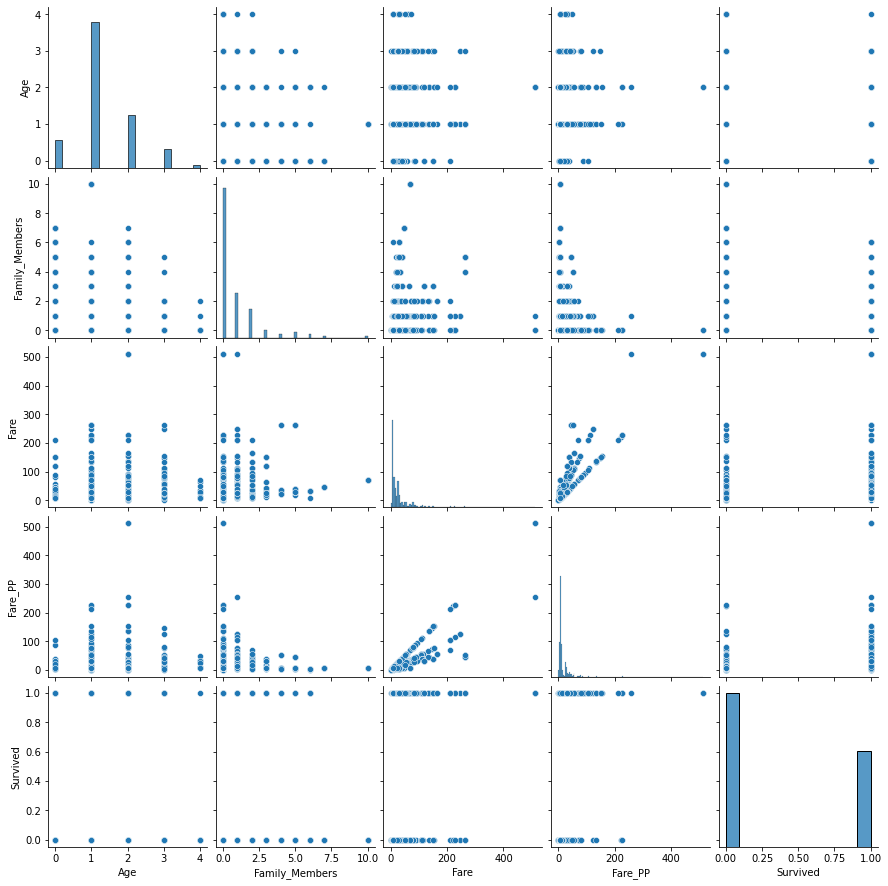

In [349]:
num_list=['Age', 'Family_Members', 'Fare', 'Fare_PP','Survived']
cat_list=["Pclass","Sex","Embarked","CabinClass","Title"]
sns.pairplot(data=train,vars=num_list)
plt.show()

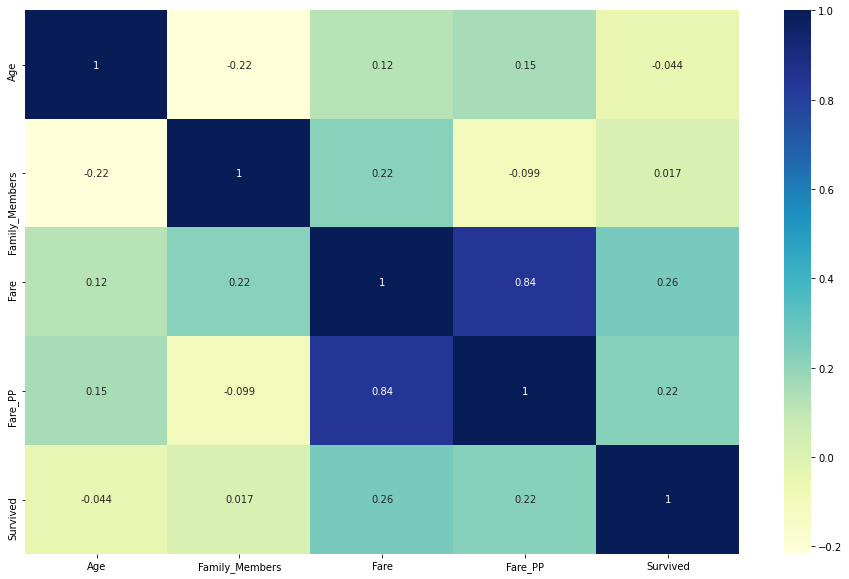

In [350]:
plt.figure(figsize = (16, 10))
sns.heatmap(train[num_list].corr(), annot = True, cmap="YlGnBu")
plt.show()

In [351]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_Members,Fare_PP,CabinClass,Title
0,0.0,3,male,1.0,7.2500,S,1,3.62500,UNK,Mr.
1,1.0,1,female,2.0,71.2833,C,1,35.64165,C,Mrs.
2,1.0,3,female,1.0,7.9250,S,0,7.92500,UNK,Miss.
3,1.0,1,female,2.0,53.1000,S,1,26.55000,C,Mrs.
4,0.0,3,male,2.0,8.0500,S,0,8.05000,UNK,Mr.


In [352]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    float64
 1   Pclass          891 non-null    object 
 2   Sex             891 non-null    object 
 3   Age             891 non-null    float64
 4   Fare            891 non-null    float64
 5   Embarked        891 non-null    object 
 6   Family_Members  891 non-null    int64  
 7   Fare_PP         891 non-null    float64
 8   CabinClass      891 non-null    object 
 9   Title           891 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 76.6+ KB


##Feature Engineering

In [353]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  

train['Pclass']= label_encoder.fit_transform(train['Pclass'])
train['Sex']= label_encoder.fit_transform(train['Sex'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [354]:
cat = train[['Embarked','CabinClass','Title']]
dummies = pd.get_dummies(cat, drop_first = True)
train = pd.concat([train,dummies],axis=1)
train= train.drop(cat, axis = 1)
train =train.drop(['CabinClass_T'], axis = 1)

In [355]:
###TEST DATA
test['Pclass']= label_encoder.fit_transform(test['Pclass'])
test['Sex']= label_encoder.fit_transform(test['Sex'])
cat = test[['Embarked','CabinClass','Title']]
dummies = pd.get_dummies(cat, drop_first = True)
test = pd.concat([test,dummies],axis=1)
test= test.drop(cat, axis = 1)

In [356]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train[['Fare','Fare_PP']] = scaler.fit_transform(train[['Fare','Fare_PP']])
test[['Fare','Fare_PP']] = scaler.fit_transform(test[['Fare','Fare_PP']])

train.head()

,Survived,Pclass,Sex,Age,Fare,Family_Members,Fare_PP,Embarked_Q,Embarked_S,CabinClass_B,CabinClass_C,CabinClass_D,CabinClass_E,CabinClass_F,CabinClass_G,CabinClass_UNK,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Officer.,Title_Royal.
0,0.0,2,1,1.0,-0.502445,1,-0.454798,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
1,1.0,0,0,2.0,0.786845,1,0.438994,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1.0,2,0,1.0,-0.488854,0,-0.334757,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
3,1.0,0,0,2.0,0.420730,1,0.185187,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.0,2,1,2.0,-0.486337,0,-0.331267,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0


In [357]:
test.shape

(418, 21)

In [358]:
train.shape

(891, 22)

# Modelling


In [359]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test = test

In [360]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

In [361]:
DT=DecisionTreeClassifier()
KNN=KNeighborsClassifier()
SVM=SVC()
LR = LogisticRegression()
NAIVE=GaussianNB()
RF = RandomForestClassifier()
Ensemble = VotingClassifier( estimators= [('KNN',KNN),('NB',NAIVE),('SVM',SVM),('DT',DT),('LR',LR),('RF',RF)], voting = 'hard')

#Applying Ensembling Technique

In [362]:
Ensemble.fit(X_train,Y_train)

VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform')),
                             ('NB',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('SVM',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='s...
                                                     criterion='gini',
                                                  

In [366]:
from sklearn import metrics
Y_pred_rand = (Ensemble.predict(X_train) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(Y_train, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(Y_train, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(Y_train, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(Y_train, Y_pred_rand)*100,2))
print('AUC : ', np.round(metrics.roc_auc_score(Y_train, Y_pred_rand)*100,2))

Precision :  92.23
Accuracy :  89.67
Recall :  79.82
F1 score :  85.58
AUC :  87.82


In [364]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

95.06

In [368]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

95.06

In [369]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

84.06